# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [19]:
medical.shape

(1338, 8)

In [20]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

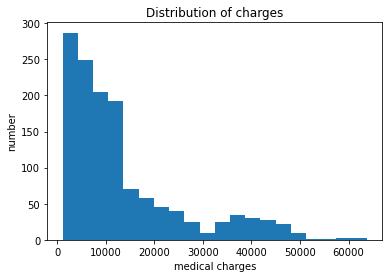

In [21]:
_ = plt.hist(medical['charges'], bins=20)
_ = plt.xlabel('medical charges')
_ = plt.ylabel('number')
_ = plt.title('Distribution of charges')

In [22]:
mean_charges = np.mean(medical['charges'])
print(mean_charges)

13270.422265141257


In [23]:
std_charges = np.std(medical['charges'])
print(std_charges)

12105.484975561612


__ANSWER:__  Mean and standard deviation are not appropriate statistics for the data. The data is highly scewed to the left with a long right tale with outliers. Therefore the mean is shifted to the right of where most of the charges are. Standard deviation similarly is not a good measure of spread because the distribution is not normal.  

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We can answer the question with the data because n is very large: 1338. Because n is large, we can assume that means of similar samples are distributed normally and we can use the Central Limit Theorem.  It is appropriate to use the t-statistic to calculate a 95% confidence of the sample mean since we do not know the actual population standard deviation.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  We can do a one-sided interval since we just need to know with 95% certainty that the average charge is greater than 12,000.

In [24]:
crit_val = t.ppf(0.05, df=1337)
print(crit_val)

-1.6459941145571324


In [25]:
# standard error = std / sqrt(sample size)
st_error = std_charges / (1338)**0.5
print(st_error)

330.9437139060842


In [26]:
# calculate the value that represents 5% likelihood that the true
# average is that value or lower.
confidence_5 = mean_charges + crit_val *st_error
print(confidence_5)

12725.690859802162


__ANSWER:__  The administrator should not be concerned. The 95% confidence interval is (12,726,  ), which is well above 12,000. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  
Null hypothesis: There is no difference between the means of the two groups.  
Alternative hypothesis: The difference between the means of the two groups is not zero.
We assume that the variances of the two groups are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [27]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [28]:
insurance = medical[medical['insuranceclaim']==1]['charges']

In [29]:
insurance.head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

In [36]:
(len(insurance), len(no_insurance))

(783, 555)

In [30]:
no_insurance = medical[medical['insuranceclaim']==0]['charges']

In [31]:
no_insurance.head()

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64

In [32]:
mean_insur = np.mean(insurance)
std_insur = np.std(insurance)
size_insur = len(insurance)
mean_no_ins = np.mean(no_insurance)
std_no_ins = np.std(no_insurance)
size_no_ins = len(no_insurance)
print(mean_insur, mean_no_ins)
print(std_insur, std_no_ins)

16423.928276537677 8821.421892306305
14036.956250260417 6440.699841605235


In [33]:
# calculate pooled standard deviation between two groups manually
n0 = size_no_ins
n1 = size_insur
s0 = std_no_ins
s1 = std_insur
std_pool = np.sqrt( ( (n0-1)*s0**2 + (n1-1)*s1**2) / (n0 + n1 -2))
print(std_pool)

11512.282899205748


In [34]:
# calculate t-statistic manually
x0_mean = mean_insur
x1_mean = mean_no_ins
sp = std_pool
t_stat = (x0_mean - x1_mean) / (sp * np.sqrt(1/n0 + 1/n1))
print(t_stat)

11.901306943555388


In [38]:
#Calculate the p-value.
1-t.cdf(t_stat, len(no_insurance)-1)

0.0

The p-value is practically 0.

In [34]:
from scipy import stats

In [36]:
stats.ttest_ind(insurance,no_insurance)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  There is not an equivalent method for performing a z-test. Z-tests
are rarely used since the standard deviations of populations are usually unknown.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test